### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 2
### Due: Saturday, Jan 27th at 11.59pm CST
---

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

1) Write down the usual form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $-\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

2) Manipulate the above equation such that you can write the left hand side in terms of a normalized half-Gaussian distribution. 

3) Draw $N=10^5$ samples from a $\sigma=3$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your equation in (2). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

4) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

5) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

In [1]:
#imports for all problems
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import scipy

#### Gaussian from -inf to +inf:
$p(x|0,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}\exp{\frac{-(x-0)^2}{2\sigma^2}}$ = $p(x|0,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}\exp{\frac{-x^2}{2\sigma^2}}$ 

such that $1 = N \int^{+\infty}_{-\infty}\exp(\frac{-x^2}{2\sigma^2}) dx$ where the normalization $N = \frac{1}{\sigma\sqrt{2\pi}}$ as seen in the Gaussian formula.

#### Part 1: Half Gaussian from 0 to +inf
$1 = N_* \int^{+\infty}_{0}\exp(\frac{-x^2}{2\sigma^2}) dx$ where $N_*$ is the new normalization.

Because a Gaussian distribution with $\mu = 0$ peaks at 0, it is symmetric about 0 and therefore the integration from 0 to $\infty$ gives $\frac{1}{2}$, which means that $N_* = 2*\frac{1}{\sigma\sqrt{2\pi}}$

$\therefore p_{Half Gaussian}(x|0,\sigma) = \frac{2}{\sigma\sqrt{2\pi}}\exp{\frac{-x^2}{2\sigma^2}}$

#### Part 2:
$p_{Half Gaussian}(x|0,\sigma) = p(x) = \frac{2}{\sigma\sqrt{2\pi}}\exp{(\frac{-x^2}{2\sigma^2})}$ where $\exp{(\frac{-x^2}{2\sigma^2})} = (\frac{\sigma\sqrt{2\pi}}{2}) p(x)$

As such, $\int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 \rightarrow (\frac{\sigma\sqrt{2\pi}}{2}) \int_0^\infty x^3 p(x) \,dx = 2\sigma^4$ 

which simplifies to $ \int_0^\infty x^3 p(x) \,dx = \frac{4\sigma^3}{\sqrt{2\pi}} $

In [2]:
#Part 3 look at lecture 3
#Draw samples from a normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo 
# integration using your equation in (2). Confirm that this approximately matches the value computed from the right hand side of the equation.
# If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors 
# from translating a normalized Gaussian to a half-Gaussian.
N = 100000
sigma = 3
Gauss = stats.norm(0,3)
Unif = stats.uniform(0,10)
distGauss = Gauss.rvs(N)
mask = 0.0<distGauss
halfGauss = distGauss[mask]
distUnif = Unif.rvs(len(halfGauss))

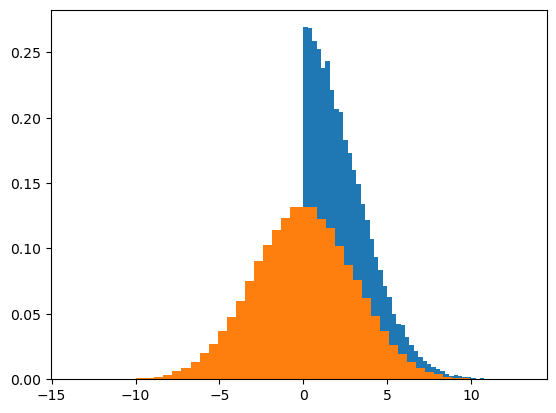

In [3]:
plt.hist(halfGauss,bins=50,density=True);
plt.hist(distGauss,bins=50,density=True);

In [92]:
#moved constants to integral results side
int_mc = (1/len(halfGauss))*np.sum(halfGauss**3)
actual = 4*sigma**3 / np.sqrt(2*np.pi)
print('Monte Carlo Integration Result:',int_mc)
print('Precise Mathematical Result:',actual)

Monte Carlo Integration Result: 43.56677116948709
Precise Mathematical Result: 43.08576628335474


In [94]:
#did not manipulate position of constants in the integral
int_mc = ((sigma*np.sqrt(2*np.pi))/2)*(1/len(halfGauss))*np.sum(halfGauss**3)
actual = 2*sigma**4
print('Monte Carlo Integration Result:',int_mc)
print('Precise Mathematical Result:',actual)

Monte Carlo Integration Result: 163.80855067172254
Precise Mathematical Result: 162


In [55]:
#Part 4
N2 = [100,1000,10000]
sigma = 3
Gauss = stats.norm(0,3)
Unif = stats.uniform(0,10)
actual = 4*sigma**3 / np.sqrt(2*np.pi)

N_tests = [[],[],[]]
for i in range(0,3):
    for j in range(0,100):
        distGauss = Gauss.rvs(N2[i])
        mask = 0.0<distGauss
        halfGauss = distGauss[mask]
        distUnif = Unif.rvs(len(halfGauss))
        
        int_mc = (1/len(halfGauss))*np.sum(halfGauss**3)
        N_tests[i].append(int_mc)#, axis=0)
        #print('yes')
    print(N2[i])#,N_tests,actual)

print('For N=100',N_tests[0])
print('---------')
print('For N=1000',N_tests[1])
print('---------')
print('For N=10000',N_tests[2])

100
1000
10000
For N=100 [89.11687490535178, 53.29531504565108, 39.953783319507686, 32.8603375983562, 34.30460785496012, 45.43416767376229, 49.636215526445355, 30.528002335202544, 40.94961566181472, 50.356746617425934, 39.749354668961274, 44.20173581567478, 22.554041488177962, 31.987389090541672, 65.13613246711459, 36.134428858901785, 38.878681814168694, 50.0307262716508, 52.96686436790799, 33.55635370610373, 48.34548527910625, 44.92121852248513, 44.681409591210056, 37.80215167362035, 36.62508781399308, 48.951450453438966, 60.804565467814825, 27.967962889854945, 53.827249897087114, 58.557188289710524, 34.771667053488855, 45.11615155560202, 51.12542019643223, 17.29082605696987, 37.23440521679721, 44.677128908646935, 51.894857217023535, 43.00515845299102, 41.90146387790474, 49.29138655480911, 99.29227746058092, 50.64399488510662, 23.69821332549451, 39.17157658129855, 35.44748781508533, 30.1062749823897, 60.18787598912465, 38.06569151773873, 34.21206929551614, 44.2326291719592, 54.9758662

Text(0, 0.5, 'Probability')

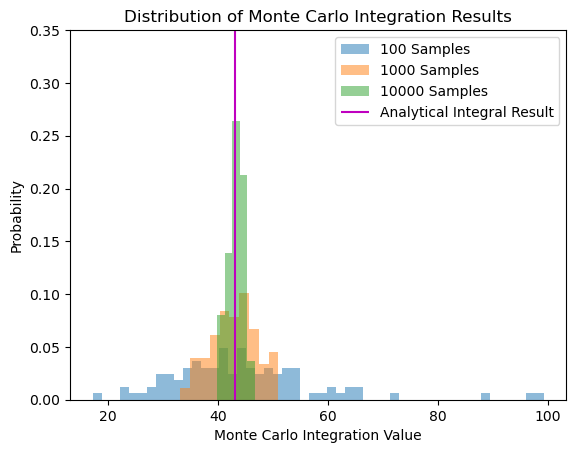

In [59]:
#plotting the distribution of monte carlo integration resuts at different N values
plt.hist(N_tests[0],bins=50,alpha=0.5,density=True, label='100 Samples');
plt.hist(N_tests[1],bins=10,alpha=0.5,density=True, label='1000 Samples');
plt.hist(N_tests[2],bins=5,alpha=0.5,density=True, label='10000 Samples');
plt.vlines(actual,0,0.35, color='m', label='Analytical Integral Result')
plt.ylim(0,0.35)
plt.legend()
plt.title('Distribution of Monte Carlo Integration Results')
plt.xlabel('Monte Carlo Integration Value')
plt.ylabel('Probability')

Text(0.5, 0, 'Number of Samples Used')

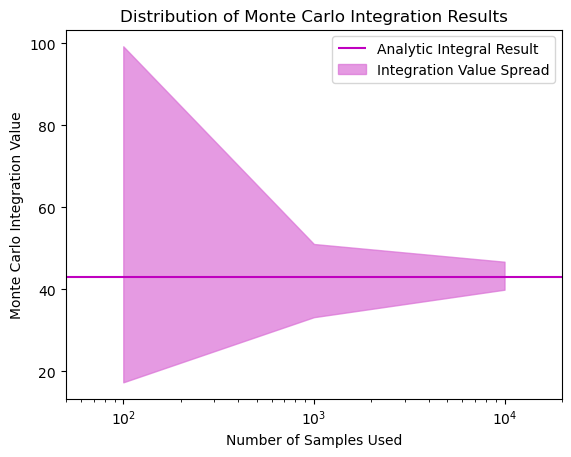

In [91]:
#Part 5
# Make a plot that shows along the -axis and the spread between the maximum and minimum Monte Carlo integral values that you get 
# at each on the -axis. (Note: matplotlib's fill_between command is useful for this). Plot a horizontal line on the same figure 
# to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as gets larger.

plt.hlines(actual,50,20000, color='m', label='Analytic Integral Result')
plt.xscale('log')
plt.xlim(50,20000)

n100 = N_tests[0]
n1000 = N_tests[1]
n10000 = N_tests[2]

x = [100,1000,10000]
ymin = [np.array(n100).min(),np.array(n1000).min(),np.array(n10000).min()]
ymax = [np.array(n100).max(),np.array(n1000).max(),np.array(n10000).max()]

plt.fill_between(x,ymin,ymax,alpha=0.7,color='orchid',label='Integration Value Spread')
plt.legend()
plt.title('Distribution of Monte Carlo Integration Results')
plt.ylabel('Monte Carlo Integration Value')
plt.xlabel('Number of Samples Used')

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

In [96]:
#Part 1
#Making object
distG = stats.norm(100,15)
distG

In [97]:
x = distG.rvs(10)
y = distG.pdf(145)
print('Ten Random Draws:',x)
print('IQ pdf at 145:',y)

Ten Random Draws: [115.67442719  84.63162383 134.49182542 104.21754315  90.24246225
 110.40609441 117.1283223   98.360351    86.22886547 118.60278215]
IQ pdf at 145: 0.00029545656079586725


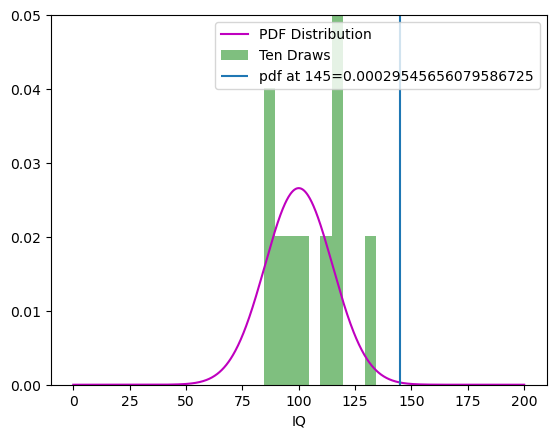

In [98]:
#plotting distribution
xgrid = np.linspace(0,200,1000)
plt.plot(xgrid,distG.pdf(xgrid), color='m',label='PDF Distribution');
plt.hist(x,bins=10,density=True,alpha=0.5,color='g',label='Ten Draws')
#plt.hist(distG.rvs(1000),bins=10,density=True,alpha=0.5,color='red',label='One Thousand Draws')
plt.vlines(145,0,0.05, label='pdf at 145='+ str(y))
plt.ylim(0,0.05)
plt.xlabel('IQ')
plt.legend()

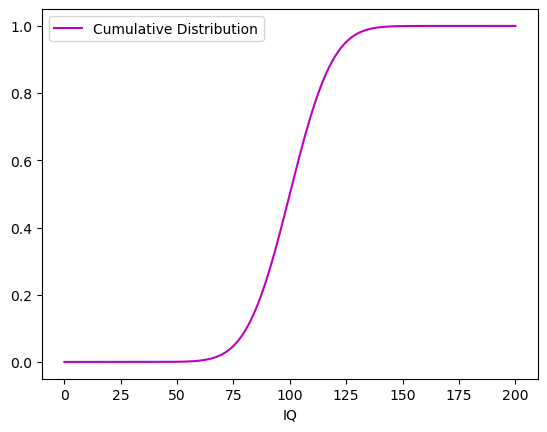

In [99]:
#Part 2: cdf - Access the cdf property of the Gaussian object and plot it over the same -range as in (1) but in a different figure. 
plt.plot(xgrid,distG.cdf(xgrid), color='m',label='Cumulative Distribution');
plt.xlabel('IQ')
plt.legend()

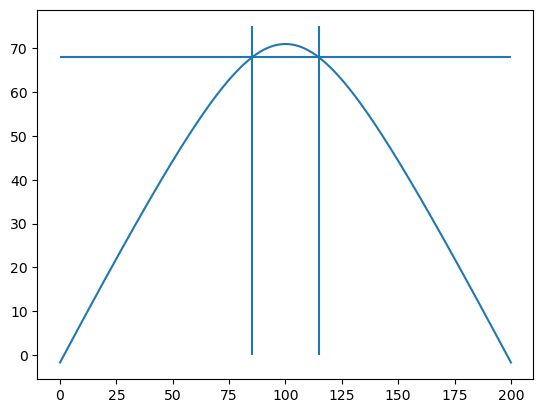

In [100]:
#experimenting with ppf to better understand what it means
plt.plot(xgrid,distG.ppf(distG.pdf(xgrid)))
plt.vlines(85,0,75)
plt.vlines(115,0,75)
plt.hlines(68,0,200)

1000 50


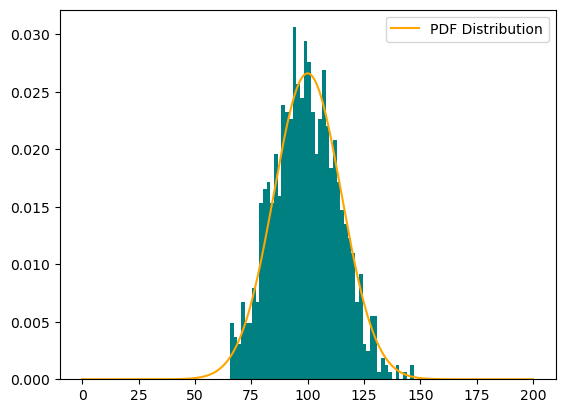

In [108]:
#Access the ppf property (percent point function) and use inverse transform sampling of the cdf to draw random samples, and make a histogram of these. 
#Overplot the pdf from (1). These should match.

#plt.plot(xgrid,distG.ppf(distG.pdf(xgrid)),color='m')
plt.plot(xgrid,distG.pdf(xgrid), color='orange',label='PDF Distribution');

#plt.plot(xgrid,distG.cdf(xgrid),color='r',label='PPF of CDF')
#plt.plot(xgrid,distG.ppf(xgrid),label='ppf')
#plt.plot(xgrid,distG.pdf(xgrid), color='m',label='PDF Distribution');

# make some sample data without cdf
iq_sample = np.random.normal(100,15,10000)
# make a simple histogram object
counts, bins = np.histogram(iq_sample, bins=50, density=True)
bin_mids = (bins[1:] + bins[:-1]) / 2 # mid location of bins
simple_cdf = np.cumsum(counts) / np.sum(counts) # very simple cumulative sum
# set up an interpolation of the inverse cumulative distribution

#cdf = distG.cdf(counts)
##tck = scipy.interpolate.interp1d(cdf, bin_mids)

cdf = stats.norm.cdf(xgrid)
print(len(cdf),len(bin_mids))
#tck = scipy.interpolate.interp1d(cdf, ???)
tck = scipy.interpolate.interp1d(simple_cdf, bin_mids)

# sample evenly along the cumulative distribution, and interpolate
# little hack to make sure no points are generated outside interpolation range.
# not ideal
u = np.random.uniform(0.01, 1, 1000) 
x_sample = tck(u)
plt.hist(x_sample, bins=50, color='teal',density=True);

plt.legend()

#Here, I was a little confused as to how to get this to work using the .cdf tool, so I resorted to using the method used in Lecture 4

In [102]:
#Part 3: fraction of people with IQ above 145
IQ145 = 1-distG.cdf(145)
print('Fraction of People with IQ > 145:',IQ145)
#total fraction is 100% of people, or 1. Subtractign the cumulative addition of all people whose IQ 
    #are lower the 145 (by taking the cdf at 145), we get the remaining fraction.

Fraction of People with IQ > 145: 0.0013498980316301035


In [103]:
#Part 4
oiam = 1e-6 #one in a million
distG.ppf(oiam)

#survival function (and inverse survival function)
distG.sf(1-oiam)

print('One-in-a-Million IQ:', distG.isf(oiam))

One-in-a-Million IQ: 171.30136463234348


## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

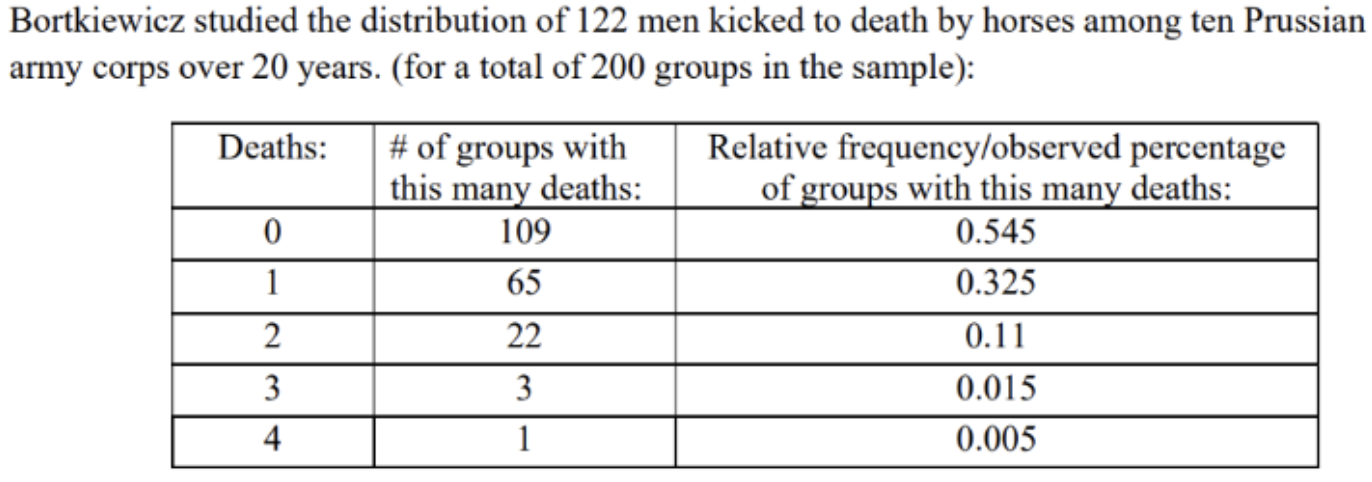

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting next week, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

Text(0, 0.5, 'Observed Percentage of Groups with X many Deaths')

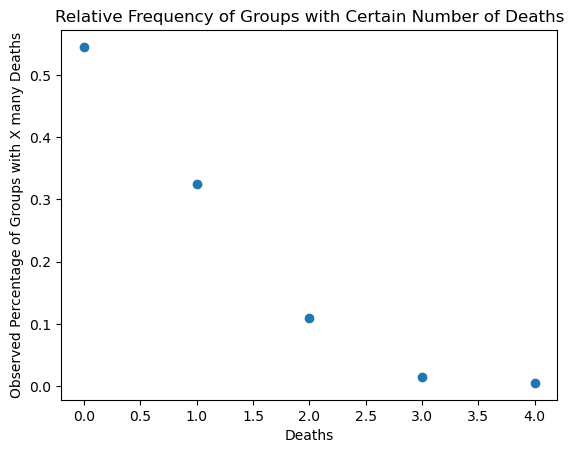

In [104]:
#Part 1
data=np.array([[0,1,2,3,4],[109,65,22,3,1],[0.545,0.325,0.11,0.015,0.005]])

plt.scatter(data[0],data[2])
plt.title('Relative Frequency of Groups with Certain Number of Deaths')
plt.xlabel('Deaths')
plt.ylabel('Observed Percentage of Groups with X many Deaths')

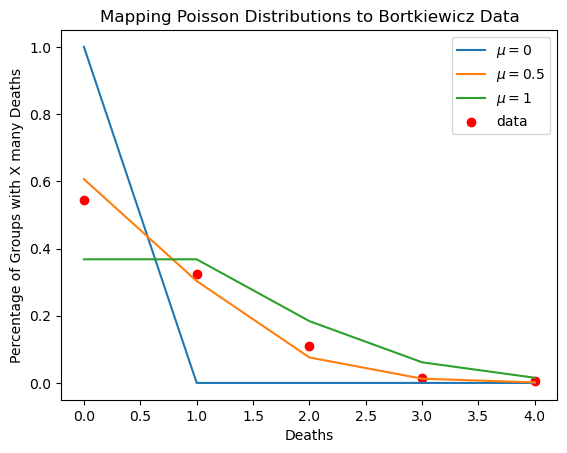

In [105]:
#Part 2: Poisson distrbutions
xgrid2 = np.linspace(0,4,5)
mu = [0,0.5,1]
for i in range(0,3):
    plt.plot(xgrid2,stats.poisson.pmf(xgrid2,mu[i]),label='$\mu =$'+str(mu[i]))

plt.scatter(data[0],data[2],color='r',label='data')
plt.xlabel('Deaths')
plt.ylabel('Percentage of Groups with X many Deaths')
plt.title('Mapping Poisson Distributions to Bortkiewicz Data')
plt.legend()

In [106]:
#Part 3
#We'll come to model fitting next week, but for now use the descriptive sample statistics that you can calculate from this data to deduce the mu
#of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note 
#that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples.
#Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table

weighted_mean = np.sum(data[0]*data[1]) / np.sum(data[1]) #weighting groups with deaths to number of deaths and dividing by total number of groups
print(weighted_mean)

0.61


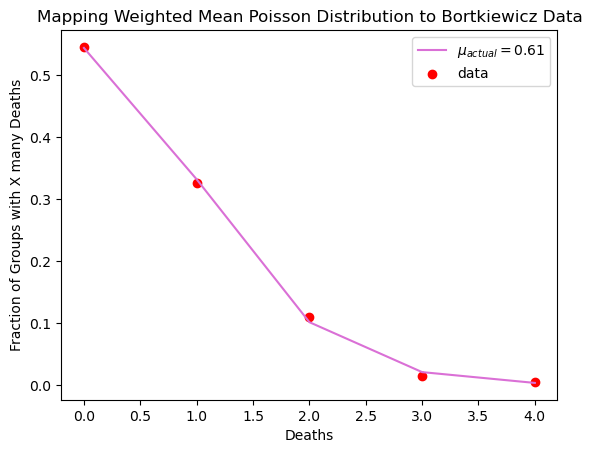

In [107]:
#Part 4
plt.plot(xgrid2,stats.poisson.pmf(xgrid2,weighted_mean),color='orchid',label='$\mu_{actual} =$'+str(weighted_mean))
plt.scatter(data[0],data[2],color='r',label='data')
plt.xlabel('Deaths')
plt.ylabel('Fraction of Groups with X many Deaths')
plt.title('Mapping Weighted Mean Poisson Distribution to Bortkiewicz Data')
plt.legend()